<a href="https://colab.research.google.com/github/heitor-eng/H_data_science/blob/master/Primeiro_Proj_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise dos Dados do Airbnb - Rio de Janeiro**

Todos os dados utilizados aqui foram obtidos apartir do site do [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

  Para essa análise exploratória inical, será baixado o seguinte arquivo:
      

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*


In [3]:
#importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  

In [4]:
#importar o arquivo listngs.csv para um data frame
df = pd.read_csv("https://raw.githubusercontent.com/heitor-eng/H_data_science/master/Paths/listings.csv")

## Análise dos Dados

Nessa etapa é importante listar todas as variáveis no data frame e verificar as entradas, para que assim, através da análise exploratória dos dados, seja possível filtrar os dados que são relevantes e otimizar a análise do projeto.

**Dicionário de Variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, é interessante verificar a cara do *dataset*, para isso é só usar a função  `.head()` que fornece as 5 primeiras entradas.


In [5]:
#mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,200,5,260,2021-02-08,2.00,1,334
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98570,-43.20193,Entire home/apt,307,3,85,2018-02-14,0.67,1,37
2,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,275,2,181,2020-03-15,2.00,1,236
3,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,120,3,356,2021-03-06,2.79,1,120
4,41198,"Modern 2bed,Top end of Copacabana",178975,Nicky,NaN,Copacabana,-22.97962,-43.19230,Entire home/apt,494,3,18,2016-02-09,0.18,2,365


### **Filtrando dados: é necessário saber quantas variáveis e quantas entradas o conjunto de dados possui e os tipos das variáveis**


Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* é a versão "resumida" do Airbnb. Na mesma página tem o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [6]:
#identificar o volume de dados do DataFrame
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}\n".format(df.shape[1]))

display(df.dtypes)

Entradas:	26628
Variáveis:	16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Verificar se há valores ausentes no dataset e a porcentagem desses valores ausentes**

  A qualidade do *dataset* está diretamente relacionada com a quantidade de valores ausentes. É importante entender logo de início se esses valores nulos são significativos comparados ao dados de entrada.
 
  * É possível que o valor `neighbourhood_group` possui 100% dos seus valores faltantes.
  * As variáveis `reviews_per_month`e `last_review` possuem valores nulos em quase metade das linhas.
  * As variáveis `host_name` e `name` têm aproximadamente 0,1% de valores nulos.


In [7]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.373329
last_review                       0.373329
host_name                         0.027039
name                              0.001089
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Em busca de trazer uma análise mais demonstrativa dos dados, é interessante criar histogramas com os dados do dataset e investigar o tipo de distribuição das variáveis**



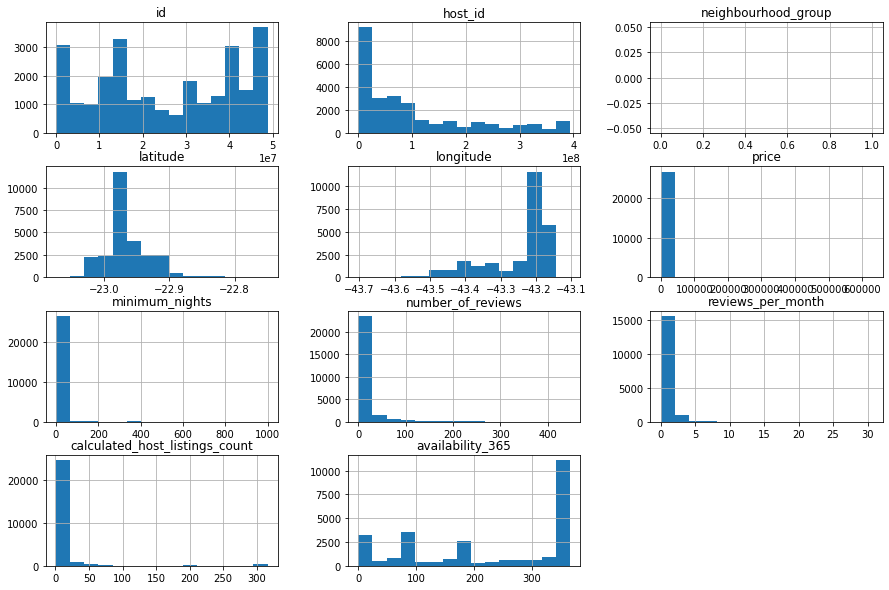

In [8]:
#plotar o histograma das variáveis numéricas

df.hist(bins=15, figsize=(15,10));

## **O que é possível perceber com os histogramas?** 

Pela distribuição do histograma é possível veríficar os indicíos da presença de *outlier*. Por exemplo as varíaveis `price`, `minimum_nights` e `calculated_host_listing_count`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar há duas maneiras rápidas que ajudam na detecção de `outliers`. 

São elas:
* Resumo estatítico por meio do método `descrive()`.
* Plotar `boxplots` para a variável.

In [9]:
# ver o resumo estatístico das varíavies numéricas
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,26628.000000,26628.000000,26628.000000,16687.000000,26628.000000,26628.000000
mean,749.774148,4.749624,12.219543,0.611649,10.021481,226.596853
std,5636.368450,19.116195,29.876552,0.860417,38.697792,138.216789
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,150.000000,1.000000,0.000000,0.090000,1.000000,89.000000
50%,264.000000,2.000000,2.000000,0.270000,1.000000,266.000000
75%,536.000000,4.000000,9.000000,0.810000,3.000000,364.000000
max,629236.000000,1000.000000,447.000000,30.650000,316.000000,365.000000


Olhando o resumo estatístico acima, pode-se confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 536, porém seu valor máximo é de 62936.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

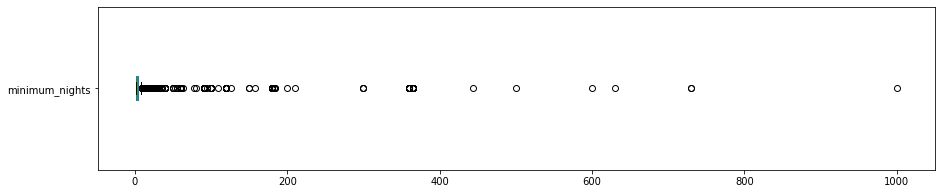


minimum_nigths: valores acima de 30
213 entradas
0.7999%


In [10]:
# minimum_nights
df.minimum_nights.plot(kind='box',vert=False,figsize=(15,3))
plt.show()

# ver a quantidade de valores acima de 30 dias para minimum_nigths
print("\nminimum_nigths: valores acima de 30")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30])/df.shape[0])*100))

### **Boxplot para `price`** 


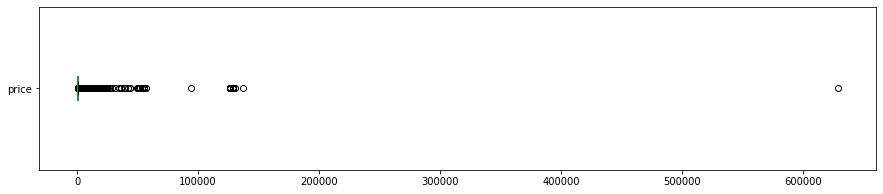


price: valores acima de 1500
1774 entradas
99.9737%


In [11]:
# price

df.price.plot(kind='box',vert=False,figsize=(15,3))
plt.show()

#ver a quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price>1500])))
print("{:.4f}%".format((len(df[df.price>30])/df.shape[0])*100))

### **Hisotgramas sem outliers**

Já verificado os *outliers* do data frame de `price` e `minimum_nights`, pode-se eliminar esses pontos de distorções e plotar histogramas fidedignos

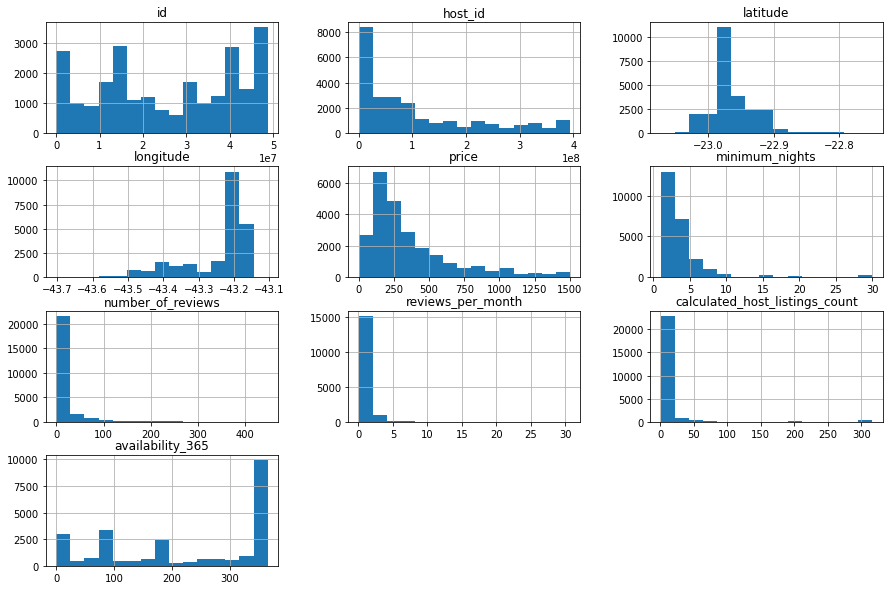

In [12]:
#remover os outliers em um novo Data Frame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index,axis=0,inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index,axis=0,inplace=True)

#remove neighbourhood_grup, pois está vazio
df_clean.drop('neighbourhood_group',axis=1, inplace=True)

#plotar o histagrama para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Qual é a correlação existente entre as variáveis?** 

Correlação significa que existe uma relação entre dois fatores. Nesse contexto, é interessante buscar relação ou semelhança entre elas.

Esta relação pode ser medida, e é função do coeficiente de correlação estabelecer qual é a intensidade dela. Para identificar a correlação entre as variáveis de interesse.

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [14]:
# Matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.131006,-0.160792,-0.171247,0.037510,0.086220
minimum_nights,0.131006,1.000000,-0.061252,-0.100352,-0.071382,-0.016667
number_of_reviews,-0.160792,-0.061252,1.000000,0.603027,-0.059252,-0.069001
reviews_per_month,-0.171247,-0.100352,0.603027,1.000000,-0.002248,-0.130835
calculated_host_listings_count,0.037510,-0.071382,-0.059252,-0.002248,1.000000,0.014065
availability_365,0.086220,-0.016667,-0.069001,-0.130835,0.014065,1.000000


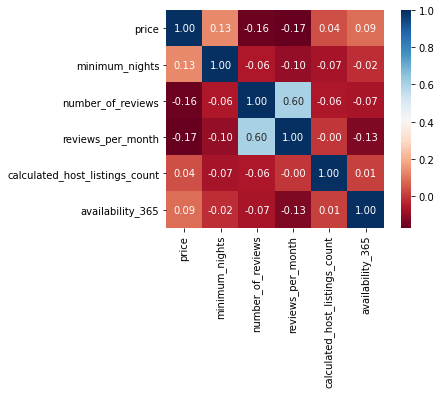

In [15]:
#heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Após esse "tratamento" nos dados é possível exibir alguns resultados, como que tipo de imóvel mais alugado no Airbnb no Rio de Janeiro?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb.

O método `value_counts()` fornece a quantidade de ocorrencia para cada tipo de aluguel. 

In [16]:
# mostra a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    17521
Private room        6446
Shared room          603
Hotel room            92
Name: room_type, dtype: int64

In [17]:
# mostra a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/ df_clean.shape[0]

Entire home/apt    0.710445
Private room       0.261374
Shared room        0.024451
Hotel room         0.003730
Name: room_type, dtype: float64

### **Outro dado interessante para investigar é a localidade e diferenciar os seus valores, como qual é a localidade mais cara e mais barata**
 
 Uma maneira de verificar uma variável em função da outra é usando `groupby()`. No caso queremos comparar os bairros (*Neighbourhoods*) a partir do preço de localização.
 

In [18]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vista Alegre        1309.000000
Cavalcanti           925.000000
Vaz Lobo             838.500000
Realengo             794.000000
Freguesia (Ilha)     761.500000
Osvaldo Cruz         622.250000
Inhoaíba             562.250000
Cacuia               560.000000
Manguinhos           560.000000
Grumari              536.333333
Name: price, dtype: float64

Acima é mostrado que os bairros como  Vaz Lobo, Engenheiro Leal, Ricardo de ALbuquerque e Paciencia, estão com a média de preços superiores a de lugares como Leblon, Lagoa e Barra da Tijuca.

Porém, essas regiões não são as mais conhecidas, como o Leblon,a Lagoa e a barra da Tijuca e para dar um exemplo de  como uma amostra pode ser não-representativa, observe o número de entradas para Vaz Lobo.

In [19]:
# Verificar a quantidade de entradas para Vaz Lobo
print(df_clean[df_clean.neighbourhood == "Vaz Lobo"].shape)

# Ver as 3 entradas do complexo do Alemão
df_clean[df_clean.neighbourhood == "Vaz Lobo"]

(2, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9283,14221134,"casa colonial 3 quartos, garagem",86402266,Lucia,Vaz Lobo,-22.85696,-43.32432,Entire home/apt,1377,15,0,NaN,NaN,1,365
21044,42012781,Casas flegler,332881900,Igor Flegler De Souza,Vaz Lobo,-22.86057,-43.32320,Private room,300,1,0,NaN,NaN,1,363


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

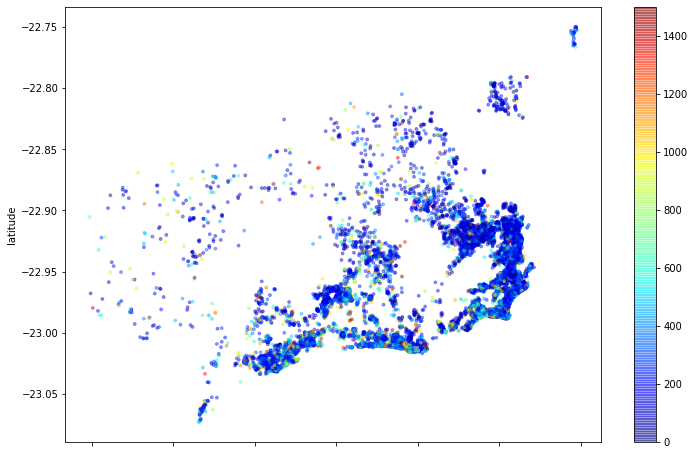

In [20]:
# Gráfico que plota as reigões alugadas

df_clean.plot(kind="scatter",x='longitude',y='latitude',alpha=0.4, c=df_clean['price'],s=8,cmap=plt.get_cmap('jet'),figsize=(12,8));

### **Conclusão**
Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.